In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
Data = pd.read_csv('creditcard.csv') 

In [3]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(Data.shape)

(284807, 31)


In [5]:
print(Data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
Valid = Data[Data['Class']==0]
Fraud = Data[Data['Class']==1]

In [7]:
OutlierFraction = len(Fraud)/float(len(Valid))

In [8]:
print(OutlierFraction)

0.0017304750013189597


In [9]:
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

Fraud Cases: 492
Valid Cases: 284315


In [10]:
print("Amount Details of the Fraud transactions")
Fraud.Amount.describe()

Amount Details of the Fraud transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
print("Amount Details of the Valid transactions")
Valid.Amount.describe()

Amount Details of the Valid transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:>

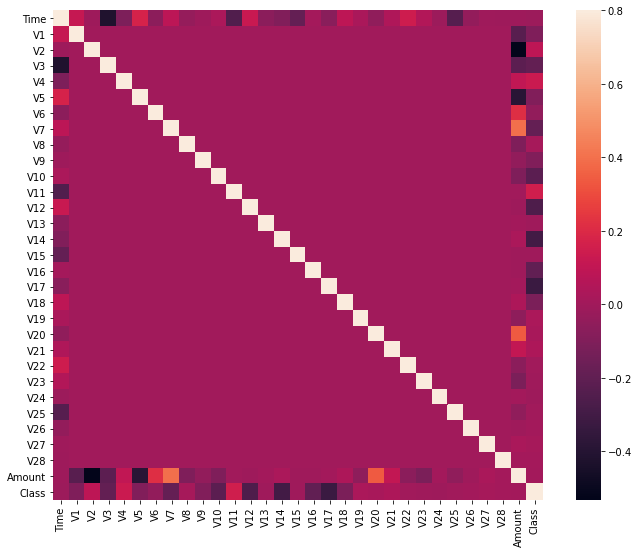

In [12]:
corrmat = Data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat,vmax = .8,square = True)

In [13]:
X = Data.drop(['Class'],axis = 1)
Y = Data['Class']

In [14]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [15]:
XData = X.values
YData = Y.values

In [16]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(XData,YData,test_size = 0.2, random_state = 42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(XTrain,YTrain)

RandomForestClassifier()

In [18]:
YPred = rfc.predict(XTest)

In [19]:
YPred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score,matthews_corrcoef,confusion_matrix

In [21]:
n_outliers = len(Fraud)
n_errors = (YPred != YTest).sum()

In [22]:
print('The Model used is Random Forest Classifier\n')
Accuracy = accuracy_score(YTest,YPred)
print("Accuracy Score: {}\n".format(Accuracy))
Precision = precision_score(YTest,YPred)
print("Precision Score: {}\n".format(Precision))
Recall = recall_score(YTest,YPred)
print("Recall Score: {}\n".format(Recall))
F_one = f1_score(YTest,YPred)
print("F1 Score: {}\n".format(F_one))
Matthew = matthews_corrcoef(YTest,YPred)
print("Matthew Correlation Coffecient Score: {}\m".format(Matthew))

The Model used is Random Forest Classifier

Accuracy Score: 0.9995611109160493

Precision Score: 0.9620253164556962

Recall Score: 0.7755102040816326

F1 Score: 0.8587570621468926

Matthew Correlation Coffecient Score: 0.8635448920046104\m


<function matplotlib.pyplot.show(close=None, block=None)>

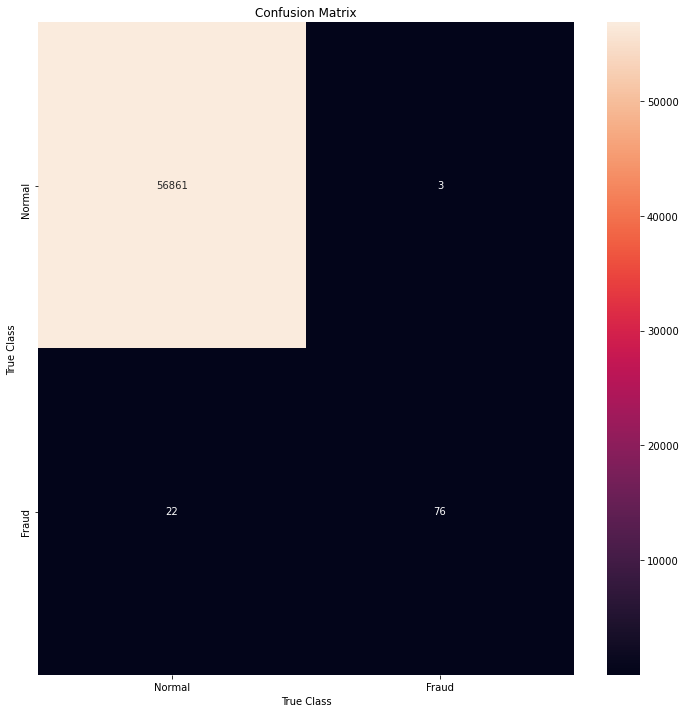

In [23]:
labels = ['Normal','Fraud']
conf_matrix = confusion_matrix(YTest,YPred)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix,xticklabels = labels,yticklabels = labels,annot = True,fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('True Class')
plt.show